In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
X_train.shape# 60000 image..where each image contain 28x28 pixels

(60000, 28, 28)

In [5]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_test.shape

(10000, 28, 28)

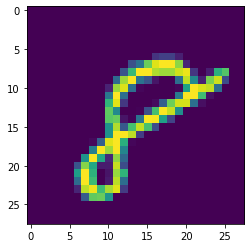

In [7]:
import matplotlib.pyplot as plt
#plt.imshow(X_train[0])
#plt.imshow(X_train[1])
plt.imshow(X_train[59999])


In [8]:
#now we are firstly making our array b/w 0 -1 ..so that convergence become fast..so dividing each value with maximum value to get this in range of 0-1


In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
model=Sequential()
#now we need to flatten the 28x28 data which is now in 2D so flattening the 2D DATA in one row 
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
#using softmax since we have more than one node in the output
model.add(Dense(10,activation='softmax'))


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
#categorical_crossentropy- need to encode labels by one hot encoding
#sparse_categorical_crossentropy- need not to encode labels by one hot encoding automatically being encoded
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [13]:
history=model.fit(X_train,y_train, epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2887 - accuracy: 0.9177 - val_loss: 0.1557 - val_accuracy: 0.9552
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1301 - accuracy: 0.9619 - val_loss: 0.1247 - val_accuracy: 0.9634
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0880 - accuracy: 0.9735 - val_loss: 0.1021 - val_accuracy: 0.9682
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0659 - accuracy: 0.9805 - val_loss: 0.0922 - val_accuracy: 0.9723
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0506 - accuracy: 0.9852 - val_loss: 0.0966 - val_accuracy: 0.9720
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0393 - accuracy: 0.9883 - val_loss: 0.0968 - val_accuracy: 0.9725
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0309 - accuracy: 0.9903 - val_loss: 0.0898 - val_accuracy:

In [14]:
y_prob=model.predict(X_test)

In [15]:
y_pred=y_prob.argmax(axis=1)

In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9756

**I have done training only on 10 epoch ..you may try with more epoch to increase the accuracy.. if it does do comment down to how much it increased.**

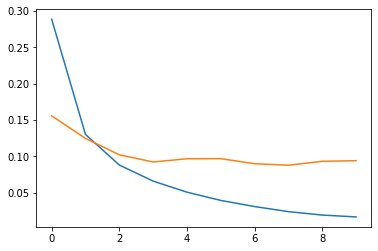

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

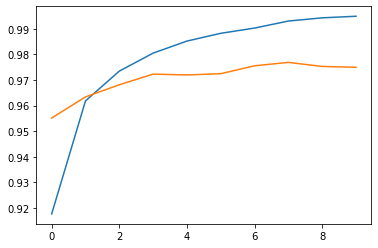

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [19]:
X_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

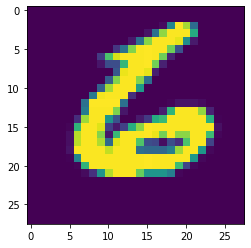

In [20]:
plt.imshow(X_test[9999])#last image

In [21]:
model.predict(X_test[9999].reshape(1,28,28)).argmax(axis=1)

array([6])